## Final Project Submission

Please fill out:
* Student name: Cecily Wahome
* Student pace: part time 
* Scheduled project review date/time: 
* Instructor name: Samuel Karu
* Blog post URL:


In [18]:
import pandas as pd 
import csv
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Loading

In [4]:
box_office_data = pd.read_csv(r'C:\Users\USER\Desktop\Phase_1_Project\dsc-phase-1-project-v2-4-master\zippedData\bom.movie_gross.csv.gz')
tmdb_data = pd.read_csv(r'C:\Users\USER\Desktop\Phase_1_Project\dsc-phase-1-project-v2-4-master\zippedData\tmdb.movies.csv.gz')

# Displaying the first few rows of each dataset
print(box_office_data.head())
print(tmdb_data.head())

                                         title studio  domestic_gross  \
0                                  Toy Story 3     BV     415000000.0   
1                   Alice in Wonderland (2010)     BV     334200000.0   
2  Harry Potter and the Deathly Hallows Part 1     WB     296000000.0   
3                                    Inception     WB     292600000.0   
4                          Shrek Forever After   P/DW     238700000.0   

  foreign_gross  year  
0     652000000  2010  
1     691300000  2010  
2     664300000  2010  
3     535700000  2010  
4     513900000  2010  
   Unnamed: 0            genre_ids     id original_language  \
0           0      [12, 14, 10751]  12444                en   
1           1  [14, 12, 16, 10751]  10191                en   
2           2        [12, 28, 878]  10138                en   
3           3      [16, 35, 10751]    862                en   
4           4        [28, 878, 12]  27205                en   

                                 origi

In [5]:
# Checking the Data Types
print("Box Office Data Types:\n", box_office_data.dtypes)
print("TMDb Data Types:\n", tmdb_data.dtypes)

Box Office Data Types:
 title              object
studio             object
domestic_gross    float64
foreign_gross      object
year                int64
dtype: object
TMDb Data Types:
 Unnamed: 0             int64
genre_ids             object
id                     int64
original_language     object
original_title        object
popularity           float64
release_date          object
title                 object
vote_average         float64
vote_count             int64
dtype: object


## Data cleaning

In [6]:
# Checking for missing values
print(box_office_data.isnull().sum())
print(tmdb_data.isnull().sum())

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64
Unnamed: 0           0
genre_ids            0
id                   0
original_language    0
original_title       0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
dtype: int64


In [7]:
# Inspecting the columns in both DataFrames
print("Box Office Data Columns: ", box_office_data.columns)
print("TMDb Data Columns: ", tmdb_data.columns)

Box Office Data Columns:  Index(['title', 'studio', 'domestic_gross', 'foreign_gross', 'year'], dtype='object')
TMDb Data Columns:  Index(['Unnamed: 0', 'genre_ids', 'id', 'original_language', 'original_title',
       'popularity', 'release_date', 'title', 'vote_average', 'vote_count'],
      dtype='object')


In [8]:
# Dropping rows with missing values in important columns based on actual columns present
box_office_data.dropna(subset=['domestic_gross', 'foreign_gross', 'title'], inplace=True)

# Check available columns in TMDb data
print("TMDb Data Columns: ", tmdb_data.columns)

# Assuming 'vote_average', 'vote_count', and 'genres' are present after inspection
if 'vote_average' in tmdb_data.columns and 'vote_count' in tmdb_data.columns and 'genres' in tmdb_data.columns:
    tmdb_data.dropna(subset=['vote_average', 'vote_count', 'genres'], inplace=True)
else:
    print("One or more required columns are missing in TMDb data.")


TMDb Data Columns:  Index(['Unnamed: 0', 'genre_ids', 'id', 'original_language', 'original_title',
       'popularity', 'release_date', 'title', 'vote_average', 'vote_count'],
      dtype='object')
One or more required columns are missing in TMDb data.


In [9]:
#ensuring there are no missing values
print("Box Office Data Missing Values:\n", box_office_data.isnull().sum())
print("TMDb Data Missing Values:\n", tmdb_data.isnull().sum())


Box Office Data Missing Values:
 title             0
studio            2
domestic_gross    0
foreign_gross     0
year              0
dtype: int64
TMDb Data Missing Values:
 Unnamed: 0           0
genre_ids            0
id                   0
original_language    0
original_title       0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
dtype: int64


In [10]:
# Dropping rows with missing 'studio' values
box_office_data.dropna(subset=['studio'], inplace=True)

In [11]:
# rechecking there are no missing values
print("Box Office Data Missing Values:\n", box_office_data.isnull().sum())
print("TMDb Data Missing Values:\n", tmdb_data.isnull().sum())

Box Office Data Missing Values:
 title             0
studio            0
domestic_gross    0
foreign_gross     0
year              0
dtype: int64
TMDb Data Missing Values:
 Unnamed: 0           0
genre_ids            0
id                   0
original_language    0
original_title       0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
dtype: int64


In [12]:
 #Checking for Duplicates
print("Box Office Data Duplicates:\n", box_office_data.duplicated().sum())
print("TMDb Data Duplicates:\n", tmdb_data.duplicated().sum())

Box Office Data Duplicates:
 0
TMDb Data Duplicates:
 0


In [13]:
#reviewing summary statistics for numerical columns to spot any anomalies.
print("Box Office Data Summary:\n", box_office_data.describe())
print("TMDb Data Summary:\n", tmdb_data.describe())


Box Office Data Summary:
        domestic_gross         year
count    2.007000e+03  2007.000000
mean     4.701984e+07  2013.506228
std      8.162689e+07     2.597997
min      4.000000e+02  2010.000000
25%      6.700000e+05  2011.000000
50%      1.670000e+07  2013.000000
75%      5.605000e+07  2016.000000
max      9.367000e+08  2018.000000
TMDb Data Summary:
         Unnamed: 0             id    popularity  vote_average    vote_count
count  26517.00000   26517.000000  26517.000000  26517.000000  26517.000000
mean   13258.00000  295050.153260      3.130912      5.991281    194.224837
std     7654.94288  153661.615648      4.355229      1.852946    960.961095
min        0.00000      27.000000      0.600000      0.000000      1.000000
25%     6629.00000  157851.000000      0.600000      5.000000      2.000000
50%    13258.00000  309581.000000      1.374000      6.000000      5.000000
75%    19887.00000  419542.000000      3.694000      7.000000     28.000000
max    26516.00000  608444.0000

In [14]:
# Converting gross columns to numeric
box_office_data['domestic_gross'] = box_office_data['domestic_gross'].replace('[\$,]', '', regex=True).astype(float)
box_office_data['foreign_gross'] = box_office_data['foreign_gross'].replace('[\$,]', '', regex=True).astype(float)


## Merging Data

In [20]:
# Merging the datasets on the title
merged_data = pd.merge(box_office_data, tmdb_data, left_on='title', right_on='title')
merged_data['total_gross'] = merged_data['domestic_gross'] + merged_data['foreign_gross']

In [16]:
#Confirm merging is successful
print("Shape of box_office_data:", box_office_data.shape)
print("Shape of tmdb_data:", tmdb_data.shape)
print("Shape of merged_data:", merged_data.shape)

print("Missing values in merged_data:\n", merged_data.isnull().sum())
print("First few rows of merged_data:\n", merged_data.head())
print("Columns in merged_data:\n", merged_data.columns)
print("Random sample of merged_data:\n", merged_data.sample(5))

Shape of box_office_data: (2007, 5)
Shape of tmdb_data: (26517, 10)
Shape of merged_data: (1701, 14)
Missing values in merged_data:
 title                0
studio               0
domestic_gross       0
foreign_gross        0
year                 0
Unnamed: 0           0
genre_ids            0
id                   0
original_language    0
original_title       0
popularity           0
release_date         0
vote_average         0
vote_count           0
dtype: int64
First few rows of merged_data:
                         title studio  domestic_gross  foreign_gross  year  \
0                 Toy Story 3     BV     415000000.0    652000000.0  2010   
1                   Inception     WB     292600000.0    535700000.0  2010   
2         Shrek Forever After   P/DW     238700000.0    513900000.0  2010   
3  The Twilight Saga: Eclipse   Sum.     300500000.0    398000000.0  2010   
4                  Iron Man 2   Par.     312400000.0    311500000.0  2010   

   Unnamed: 0                genre_id

## Data Analysis

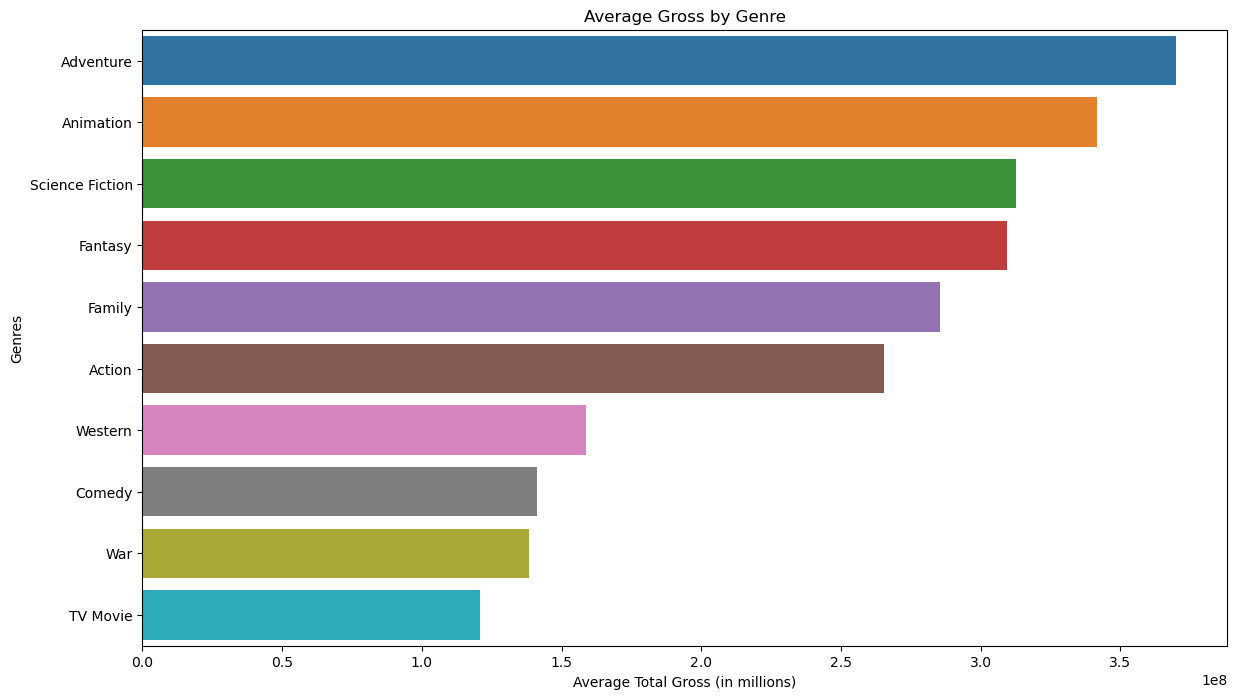

In [21]:
#Doing a genre analysis
# Explode genre_ids and calculate average gross by genre
merged_data['genres'] = merged_data['genre_ids'].apply(lambda x: eval(x) if isinstance(x, str) else [])
genre_gross = merged_data.explode('genres')
genre_gross = genre_gross.groupby('genres')['total_gross'].mean().sort_values(ascending=False).reset_index()

# Map genre IDs to names
genre_mapping = {28: 'Action', 12: 'Adventure', 16: 'Animation', 35: 'Comedy', 80: 'Crime', 99: 'Documentary', 
                 18: 'Drama', 10751: 'Family', 14: 'Fantasy', 36: 'History', 27: 'Horror', 10402: 'Music', 
                 9648: 'Mystery', 10749: 'Romance', 878: 'Science Fiction', 10770: 'TV Movie', 53: 'Thriller', 
                 10752: 'War', 37: 'Western'}
genre_gross['genres'] = genre_gross['genres'].map(genre_mapping)

# Visualization: Average Gross by Genre
plt.figure(figsize=(14, 8))
sns.barplot(x='total_gross', y='genres', data=genre_gross.head(10))
plt.title('Average Gross by Genre')
plt.xlabel('Average Total Gross (in millions)')
plt.ylabel('Genres')
plt.show()
